In [1]:
import csv
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from matplotlib import ticker
import joypy
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from itertools import product

In [2]:
# Distances functions
#from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# For more info on how to implement in Python check https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#examples-using-sklearn-metrics-pairwise-distances and https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

## formula to match iso with localid in excel
=VLOOKUP(A2:A75187;Sheet1!A2:D101;4;FALSE)

In [25]:
ds = pd.read_excel('cleanedLocalISO.xlsx', sheet_name='Reviews', decimal=",", engine='openpyxl')
dsISO = pd.read_excel('userISO.xlsx', decimal=",")
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,84022,99,MAG001,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,84022,24,UK,23071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,84022.0,NaN,NaN,NaN,13.609317,0.0,3.0,12.0,24.0,39.0,11.740607
globalRating,84022.0,NaN,NaN,NaN,4.485135,4.0,4.5,4.5,4.5,5.0,0.178728
positionOnRanking,84022.0,NaN,NaN,NaN,3.905096,1.0,1.0,2.0,6.0,55.0,4.859406
sitesOnRanking,84022.0,NaN,NaN,NaN,743.663219,5.0,154.0,487.0,1186.0,3837.0,793.367315
totalReviews,84022.0,NaN,NaN,NaN,41060.391124,5179.0,14152.0,24454.0,51324.0,163828.0,43532.779269
userName,84022,64982,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,71718,12460,"London, UK",3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84022.0,NaN,NaN,NaN,479.916808,0.0,20.0,66.0,216.0,607732.0,7281.411885


In [26]:
# don't run twice otherwise will create two diffent columns for the userISO
# Here we merge togheter the info about the two files
ds = ds.merge(dsISO[['userName','userISO']], on='userName', how ='left')
ds = ds.drop_duplicates()
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,84022,99,MAG001,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,84022,24,UK,23071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,84022.0,NaN,NaN,NaN,13.609317,0.0,3.0,12.0,24.0,39.0,11.740607
globalRating,84022.0,NaN,NaN,NaN,4.485135,4.0,4.5,4.5,4.5,5.0,0.178728
positionOnRanking,84022.0,NaN,NaN,NaN,3.905096,1.0,1.0,2.0,6.0,55.0,4.859406
sitesOnRanking,84022.0,NaN,NaN,NaN,743.663219,5.0,154.0,487.0,1186.0,3837.0,793.367315
totalReviews,84022.0,NaN,NaN,NaN,41060.391124,5179.0,14152.0,24454.0,51324.0,163828.0,43532.779269
userName,84022,64982,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,71718,12460,"London, UK",3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84022.0,NaN,NaN,NaN,479.916808,0.0,20.0,66.0,216.0,607732.0,7281.411885


In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84022 entries, 0 to 84021
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            84022 non-null  object        
 1   localISO           84022 non-null  object        
 2   cluster            84022 non-null  int64         
 3   globalRating       84022 non-null  float64       
 4   positionOnRanking  84022 non-null  int64         
 5   sitesOnRanking     84022 non-null  int64         
 6   totalReviews       84022 non-null  int64         
 7   userName           84022 non-null  object        
 8   userLocation       71718 non-null  object        
 9   userContributions  84022 non-null  int64         
 10  tripType           57898 non-null  object        
 11  reviewWritten      84022 non-null  datetime64[ns]
 12  reviewVisited      84022 non-null  datetime64[ns]
 13  reviewRating       84022 non-null  int64         
 14  review

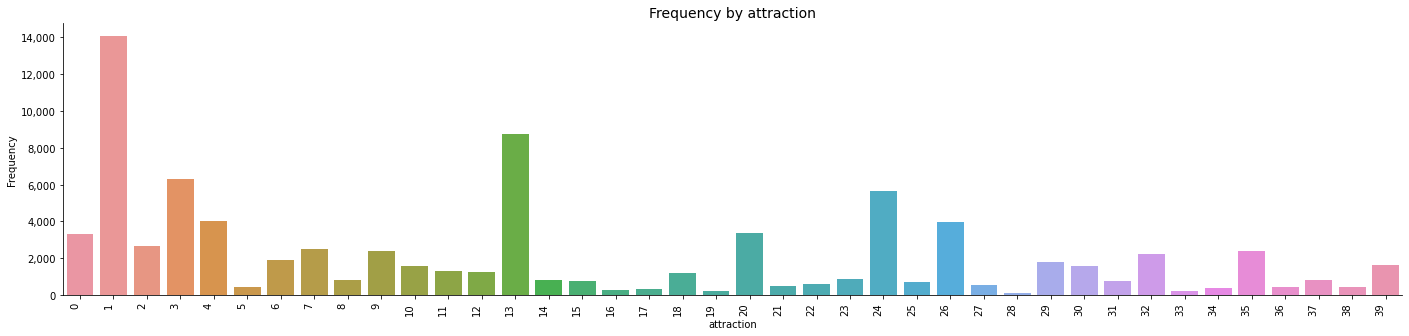

In [8]:
# Frequency by attraction

# Draw
fig, ax = plt.subplots(figsize=(24,5))
g = sns.countplot(x=ds['cluster'], data=ds)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency by attraction", fontsize=plots_Title_fontSize)
plt.xlabel("attraction")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.xticks(rotation=90, ha='right');

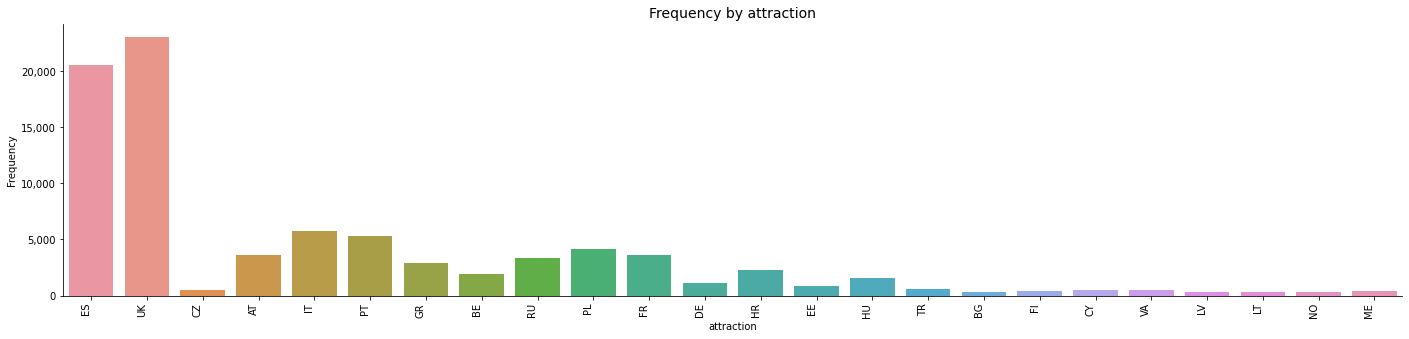

In [9]:
# Frequency by attraction

# Draw
fig, ax = plt.subplots(figsize=(24,5))
g = sns.countplot(x=ds['localISO'], data=ds)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency by attraction", fontsize=plots_Title_fontSize)
plt.xlabel("attraction")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.xticks(rotation=90, ha='right');

In [10]:
ds['localID'].value_counts()

MAG001    7883
MAG003    4944
MAG006    4583
MAG002    2671
MAG024    2418
          ... 
MAG068      76
MAG094      63
MAG098      61
MAG099      60
MAG100      51
Name: localID, Length: 99, dtype: int64

In [11]:
ds['cluster'].value_counts()

1     14065
13     8736
3      6317
24     5642
4      4043
26     3987
20     3385
0      3319
2      2685
7      2477
9      2409
35     2376
32     2257
6      1903
29     1815
39     1609
30     1565
10     1564
11     1300
12     1253
18     1202
23      878
8       833
37      813
14      810
31      779
15      761
25      695
22      620
27      528
21      508
38      458
36      445
5       424
34      388
17      302
16      298
33      243
19      207
28      123
Name: cluster, dtype: int64

In [39]:
# Create columns with before and after the Rona 
# Make two diffferent lists

ds['BeforeAfter'] = np.where(ds['reviewVisited'] <= pd.to_datetime('2020/03/01 00:00:00'), 'before', 'after')

before = ds[ds['BeforeAfter'] == 'before']
after = ds[ds['BeforeAfter'] != 'before']

In [13]:
before['localID'].value_counts()

MAG001    7795
MAG003    4610
MAG006    4193
MAG002    2617
MAG011    2305
          ... 
MAG068      62
MAG094      56
MAG098      56
MAG099      51
MAG100      45
Name: localID, Length: 99, dtype: int64

In [14]:
after['localID'].value_counts()

MAG024    530
MAG006    390
MAG043    352
MAG003    334
MAG075    309
         ... 
MAG098      5
MAG097      4
MAG073      4
MAG081      2
MAG059      2
Name: localID, Length: 99, dtype: int64

## Check if userContributions is usefull

In [44]:
ds['userFreq'] = ds.groupby('userName')['userName'].transform('count')
ds['ratioFreqContribution'] = ds['userFreq'] / ds['userContributions']
dsRatio = ds[ds['userContributions'] != 0]
# dsRatio = dsRatio[dsRatio['userContributions'] < 2000] # Use this only to show that even if we remove outliers nothing changes

In [16]:
dsRatio.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,84012,99,MAG001,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,84012,24,UK,23061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,84012.0,NaN,NaN,NaN,13.610579,0.0,3.0,12.0,24.0,39.0,11.740735
globalRating,84012.0,NaN,NaN,NaN,4.485133,4.0,4.5,4.5,4.5,5.0,0.178738
positionOnRanking,84012.0,NaN,NaN,NaN,3.904609,1.0,1.0,2.0,6.0,55.0,4.85949
sitesOnRanking,84012.0,NaN,NaN,NaN,743.69377,5.0,154.0,487.0,1186.0,3837.0,793.409589
totalReviews,84012.0,NaN,NaN,NaN,41059.16944,5179.0,14152.0,24454.0,51324.0,163828.0,43535.226062
userName,84012,64973,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,71709,12458,"London, UK",3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84012.0,NaN,NaN,NaN,479.973932,1.0,20.0,67.0,216.0,607732.0,7281.84335


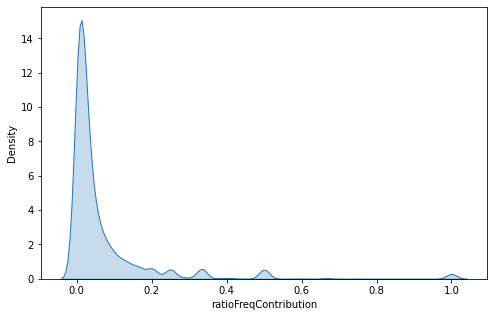

In [17]:
# DENSITY PLOT (Kernel Density Estimate)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.kdeplot(dsRatio['ratioFreqContribution'], shade=True, legend=False)

In [22]:
dsAll = ds.groupby('userISO')['userISO'].count()
dsAll = dsAll.to_frame()
dsAll = dsAll.rename(columns={'userISO': 'iso'})
dsAll.reset_index(inplace=True, level=['userISO'])
dsAll.sort_values(by=['iso'], inplace=True, ascending=False)

dsAll.head(20)


,userISO,iso
226,UK,27085
227,US,18580
11,AU,3974
41,CA,3040
70,ES,1078
101,IE,1062
104,IN,1004
163,NL,826
60,DE,758
77,FR,696


In [37]:
# we try to perfom analysis on people who have visited portugal
dsPT = ds[ds["localISO"] == "PT"]

ds['same_iso'] = np.where(ds['localISO'] == ds['userISO'], True, False) # I will create a new column that tell you if a review is written in the same country where the user live


dsPT = dsPT.groupby('userISO')['userISO'].count() # I create a dataframe with the count of all the iso code in order to make a comparison, in this case they are only the review about portugal attractions
dsPT = dsPT.to_frame()
dsPT = dsPT.rename(columns={'userISO': 'iso'})
dsPT.reset_index(inplace=True, level=['userISO'])

dsAll = ds[ds['same_iso'] == False] # Here I do the same with all the review made in a country wich is not the same of the reviewer
dsAll = dsAll.groupby('userISO')['userISO'].count()
dsAll = dsAll.to_frame()
dsAll = dsAll.rename(columns={'userISO': 'iso'})
dsAll.reset_index(inplace=True, level=['userISO'])

inner_join = pd.merge(dsPT, dsAll, on ='userISO',how ='inner', suffixes=('_pt', '_all')) # Here I make the ration between the review about portuguese attraction and the reviews made outside portugal not in the same country of the reviewer
inner_join['ratioPT'] = (inner_join['iso_pt'] / inner_join['iso_all']) * 100
inner_join = inner_join[(inner_join['userISO'] == 'UK') | (inner_join['userISO'] == 'FR') | (inner_join['userISO'] == 'ES') | (inner_join['userISO'] == 'DE') | (inner_join['userISO'] == 'CH') | (inner_join['userISO'] == 'NL') | (inner_join['userISO'] == 'IT') | (inner_join['userISO'] == 'BE')] # Filtering only the countries finded on the business understading part
inner_join.sort_values(by=['ratioPT'], inplace=True, ascending=False)

inner_join.head(30)


,userISO,iso_pt,iso_all,ratioPT
31,ES,73,423,17.257683
11,BE,54,448,12.053571
50,IT,58,505,11.485149
74,NL,88,826,10.653753
36,FR,58,554,10.469314
25,DE,58,710,8.169014
18,CH,33,417,7.913669
102,UK,1143,16350,6.990826


## here we need to do the analysis only with the iso code that we have on attractions

In [41]:
before['same_iso'] = np.where(before['localISO'] == before['userISO'], True, False)
ratioBefore = before.groupby('same_iso')['same_iso'].count()
ratioBefore = ratioBefore.to_frame()
ratioBefore['same_iso_%'] = (ratioBefore['same_iso'] / before.shape[0]) * 100

ratioBefore.head()

/tmp/ipykernel_73955/2700745830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['same_iso'] = np.where(before['localISO'] == before['userISO'], True, False)


,same_iso,same_iso_%
same_iso,,
False,68668,86.944631
True,10311,13.055369


In [42]:
after['same_iso'] = np.where(after['localISO'] == after['userISO'], True, False)
ratioAfter = after.groupby('same_iso')['same_iso'].count()
ratioAfter = ratioAfter.to_frame()
ratioAfter['same_iso_%'] = (ratioAfter['same_iso'] / after.shape[0]) * 100

ratioAfter.head()

/tmp/ipykernel_73955/383524102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['same_iso'] = np.where(after['localISO'] == after['userISO'], True, False)


,same_iso,same_iso_%
same_iso,,
False,2553,50.624628
True,2490,49.375372


# Apriori 

In [79]:
# this necessary for the centered cosine and should be launched before the line dsMoreThen
ds["averageRating"] = ds.groupby('userName')['reviewRating'].transform('mean')
ds['diffAvgRating'] = ds['reviewRating'] - ds['averageRating']

In [80]:
dsMoreThan = ds[ds['userFreq'] > 2] # for the apriori two is the one that give us more rows as possible, because with one you cannot perform the analysis
dsMoreThan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14515 entries, 7 to 84019
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   localID                14515 non-null  object        
 1   localISO               14515 non-null  object        
 2   cluster                14515 non-null  int64         
 3   globalRating           14515 non-null  float64       
 4   positionOnRanking      14515 non-null  int64         
 5   sitesOnRanking         14515 non-null  int64         
 6   totalReviews           14515 non-null  int64         
 7   userName               14515 non-null  object        
 8   userLocation           13412 non-null  object        
 9   userContributions      14515 non-null  int64         
 10  tripType               9489 non-null   object        
 11  reviewWritten          14515 non-null  datetime64[ns]
 12  reviewVisited          14515 non-null  datetime64[ns]
 13  r

In [46]:
dsMoreThan.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,14515,99,MAG001,1155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,14515,24,ES,4823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,14515.0,NaN,NaN,NaN,12.436376,0.0,1.0,8.0,24.0,39.0,11.554885
globalRating,14515.0,NaN,NaN,NaN,4.483086,4.0,4.5,4.5,4.5,5.0,0.208193
positionOnRanking,14515.0,NaN,NaN,NaN,4.33772,1.0,1.0,2.0,6.0,55.0,5.473919
sitesOnRanking,14515.0,NaN,NaN,NaN,822.668481,5.0,160.0,487.0,1186.0,3837.0,833.633542
totalReviews,14515.0,NaN,NaN,NaN,38418.983121,5179.0,14132.0,23293.0,42555.0,163828.0,41291.442945
userName,14515,3771,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,13412,1757,"London, UK",561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,14515.0,NaN,NaN,NaN,1844.678195,3.0,108.0,327.0,943.0,607732.0,17035.601097


### With this analysis we understood which are the locations visited togheter, we used this to create clusters

In [48]:
# Create a pivot table
pt = pd.pivot_table(dsMoreThan[['userName','localID']],
                    index='userName',                                  # Each row will be a document (invoice)
                    columns='localID',                       # Each product will be a column
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0
pt.head()

localID,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG091,MAG092,MAG093,MAG094,MAG095,MAG096,MAG097,MAG098,MAG099,MAG100
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234texas@1234texas,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
frequent_itemsets = apriori(pt, min_support=0.01, use_colnames=True)

/home/tosk/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


The threshold needs to be low becuase of how this dataset is strucured, in order to use a higher one we need to ask users reviews for each places they visited

In [63]:
# Generate the association rules - by support
rulesSupport = association_rules(frequent_itemsets, metric="support", min_threshold=0.1) # with support 0.1 you find the one with higher support using two reviews per user
rulesSupport.sort_values(by='confidence', ascending=False, inplace=True) # sorted by confidence in order to know which are the location visited toghter whit higher chance
rulesSupport.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MAG002),(MAG001),0.207902,0.298595,0.186158,0.895408,2.998743,0.124079,6.706121
2,(MAG004),(MAG001),0.150093,0.298595,0.134182,0.893993,2.994003,0.089365,6.616592
4,(MAG023),(MAG001),0.123840,0.298595,0.108990,0.880086,2.947427,0.072012,5.849221
1,(MAG001),(MAG002),0.298595,0.207902,0.186158,0.623446,2.998743,0.124079,2.103542
3,(MAG001),(MAG004),0.298595,0.150093,0.134182,0.449378,2.994003,0.089365,1.543541
5,(MAG001),(MAG023),0.298595,0.123840,0.108990,0.365009,2.947427,0.072012,1.379799


### This analysis can be useful to discover who are the competitors of Portugal

In [57]:
# Create a pivot table
ptISO = pd.pivot_table(dsMoreThan[['userName','localISO']],
                    index='userName',                                  # Each row will be a document (invoice)
                    columns='localISO',                       # Each product will be a column
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0
ptISO.head()

localISO,AT,BE,BG,CY,CZ,DE,EE,ES,FI,FR,...,LT,LV,ME,NO,PL,PT,RU,TR,UK,VA
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1234texas@1234texas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
frequent_itemsetsISO = apriori(ptISO, min_support=0.001, use_colnames=True)

/home/tosk/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [68]:
# Generate the association rules - by support
rulesSupportISO = association_rules(frequent_itemsetsISO, metric="support", min_threshold=0.06) # suport 0.6 is the higher with two reviews per user
rulesSupportISO.sort_values(by='confidence', ascending=False, inplace=True)
rulesSupportISO.head(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PT),(ES),0.153805,0.450544,0.062318,0.405172,0.899297,-0.006978,0.923724
2,(UK),(ES),0.285070,0.450544,0.062583,0.219535,0.487267,-0.065854,0.704011
3,(ES),(UK),0.450544,0.285070,0.062583,0.138905,0.487267,-0.065854,0.830257
0,(ES),(PT),0.450544,0.153805,0.062318,0.138317,0.899297,-0.006978,0.982025


### With at least 2 reviews per user and threshold of 0.06:
- We have seen that people 15% of the reviews are portugues and 45% spanish, the confidence of goes in spain after been in portugal is 40%
- The confidence of going in spain after been in portugal is 13%

In [69]:
# Create a pivot table
ptCluster = pd.pivot_table(dsMoreThan[['userName','cluster']],
                    index='userName',                                  # Each row will be a document (invoice)
                    columns='cluster',                       # Each product will be a column
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)   # The value should be 1 if the product is present in the document, otherwise 0
ptCluster.head()

cluster,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1234texas@1234texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
frequent_itemsetsCluster = apriori(ptCluster, min_support=0.001, use_colnames=True)

/home/tosk/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [75]:
# Generate the association rules - by support
rulesSupportCluster = association_rules(frequent_itemsetsCluster, metric="support", min_threshold=0.05) # 0.05 is the highest support
rulesSupportCluster.sort_values(by='confidence', ascending=False, inplace=True)
rulesSupportCluster.head(200)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(39),(4),0.075842,0.137629,0.055423,0.730769,5.309693,0.044985,3.203091
0,(4),(39),0.137629,0.075842,0.055423,0.402697,5.309693,0.044985,1.547219


In [58]:
#Cluster number 11- Porto with cluster number 26- Lisbon

# data similarity

## between localid

In [81]:
# Create a pivot table
pt = pd.pivot_table(dsMoreThan[['userName','localID','diffAvgRating']],
                    index='userName',                                  # Each row will be a user
                    columns='localID',                       # Each product will be a column
                    values='diffAvgRating',                                     # The value will be the rating for the localID
                    aggfunc='mean').fillna(0)   # The mean rating will be used if multiple ratings exist for the same user and localID
pt.head()


localID,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG091,MAG092,MAG093,MAG094,MAG095,MAG096,MAG097,MAG098,MAG099,MAG100
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.4,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234texas@1234texas,0.0,0.0,0.0,0.0,0.0,0.000000,0.4,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
user_similarity_matrix = pd.DataFrame(
    pairwise_distances(pt,metric='cosine'),
    columns = pt.index,
    index = pt.index,
)
user_similarity_matrix = user_similarity_matrix.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
user_similarity_matrix

userName,-medvem-@-medvem-,0Garza@0Garza,1039@1039,111TWIGAMINHAAFRIKA@Mobile35942195053,1234texas@1234texas,123susan456@123susan456,12:@L0V3T0TRAV3L97,130Doug@130Doug,139bobc139@139bobc139,15traveladdict9@15traveladdict9,...,yns_10@yns_10,yoaggie@yoaggie,zdaati@zdaati,zoegray2019@zoegray2019,zuni P@zunip,zuv@zuv,ΓΙΩΡΓΟΣ Χ@47georgec,Γιώργος Κ@gkvdel,ΣΤΥΛΙΑΝΟΣ Κ@X8903MQ_,יוסי מ@K454TO_
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
0Garza@0Garza,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,-0.074536,0.0,0.0,0.0,0.0,-0.333333
1039@1039,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000e+00,0.0,-0.298142,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.000000,0.0,1.0,0.000000,0.0,2.220446e-16,0.0,0.000000,0.079682,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1234texas@1234texas,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.105409,0.000000,0.0,0.0,0.0,0.0,-0.223607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuv@zuv,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
ΓΙΩΡΓΟΣ Χ@47georgec,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Γιώργος Κ@gkvdel,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [97]:
# Similiar products matrix
localID_similarity = pd.DataFrame(
    pairwise_distances(pt.T,metric='cosine'),
    columns = pt.columns,
    index = pt.columns
    )
localID_similarity = localID_similarity.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
localID_similarity

localID,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG091,MAG092,MAG093,MAG094,MAG095,MAG096,MAG097,MAG098,MAG099,MAG100
localID,,,,,,,,,,,,,,,,,,,,,
MAG001,1.000000,-0.398183,-0.011202,-0.244622,-0.014874,-0.008640,-0.010383,0.029345,0.005842,-0.048596,...,-0.002339,-0.012586,0.001140,0.000040,-0.009525,-0.013374,-0.034920,0.020540,0.0,0.018048
MAG002,-0.398183,1.000000,-0.010494,-0.225141,-0.003707,-0.022186,-0.010165,-0.040922,-0.003864,-0.009529,...,-0.003989,-0.004975,-0.005258,0.024073,0.005692,-0.001527,-0.009405,-0.007430,0.0,-0.007115
MAG003,-0.011202,-0.010494,1.000000,-0.014578,0.003948,-0.074047,-0.029921,-0.001724,0.012066,-0.010929,...,-0.019646,-0.019673,0.002937,0.000076,0.011517,-0.007199,0.000000,0.000000,0.0,0.000000
MAG004,-0.244622,-0.225141,-0.014578,1.000000,0.002216,-0.009436,0.002381,-0.056996,-0.022703,-0.011394,...,-0.012048,0.005966,-0.001783,0.000046,0.000000,-0.010127,-0.026440,0.003003,0.0,0.017546
MAG005,-0.014874,-0.003707,0.003948,0.002216,1.000000,-0.009084,-0.156305,0.000295,-0.023977,0.004458,...,0.000000,0.000000,-0.018534,0.000000,0.000000,-0.010083,0.000000,0.013320,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG096,-0.013374,-0.001527,-0.007199,-0.010127,-0.010083,0.009565,-0.006807,0.006984,-0.110177,0.000000,...,0.000000,-0.015558,0.000000,0.000000,0.000000,1.000000,-0.020187,0.000000,0.0,-0.053345
MAG097,-0.034920,-0.009405,0.000000,-0.026440,0.000000,-0.002613,0.000000,-0.014728,0.000000,0.037881,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020187,1.000000,0.008533,0.0,-0.057456
MAG098,0.020540,-0.007430,0.000000,0.003003,0.013320,0.000000,0.009592,-0.008910,0.011316,-0.108993,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008533,1.000000,0.0,0.164803


### We print this excel in order to see the value of the similarity, because can happen that in top 3 we have value with similarity 0

In [85]:
localID_similarity.reset_index(inplace=True, level=['localID'])
localID_similarity.to_excel('localID_similarity.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

2022-12-21 14:28:56.498939


In [84]:
# Top 10 attractions similar to ' Torre de Belém'
top_10_similar_items = list(
    localID_similarity
        .loc['MAG010']
        .sort_values(ascending=False)
        .iloc[1:11]         # 1 to 11 instead of 0 to 10 because the first is the location itself
    .index
)
top_10_similar_items

['MAG097',
 'MAG085',
 'MAG080',
 'MAG081',
 'MAG050',
 'MAG043',
 'MAG028',
 'MAG023',
 'MAG072',
 'MAG030']

### between iso

In [99]:
# Create a pivot table
ptISO = pd.pivot_table(dsMoreThan[['userName','localISO','diffAvgRating']],
                    index='userName',                                  # Each row will be a user
                    columns='localISO',                       # Each product will be a column
                    values='diffAvgRating',                                     # The value will be the rating for the localID
                    aggfunc='mean').fillna(0)   # The mean rating will be used if multiple ratings exist for the same user and localID
ptISO.head()


localISO,AT,BE,BG,CY,CZ,DE,EE,ES,FI,FR,...,LT,LV,ME,NO,PL,PT,RU,TR,UK,VA
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.480297e-16,0.0,0.0,0.000000e+00,0.0
1039@1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.552714e-16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,2.960595e-16,0.0
1234texas@1234texas,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,-6.000000e-01,0.0,0.0,0.000000e+00,0.0


In [100]:
# Similiarity of users
user_similarity_matrixISO = pd.DataFrame(
    pairwise_distances(ptISO,metric='cosine'),
    columns = ptISO.index,
    index = ptISO.index
)
user_similarity_matrixISO = user_similarity_matrixISO.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
user_similarity_matrixISO

userName,-medvem-@-medvem-,0Garza@0Garza,1039@1039,111TWIGAMINHAAFRIKA@Mobile35942195053,1234texas@1234texas,123susan456@123susan456,12:@L0V3T0TRAV3L97,130Doug@130Doug,139bobc139@139bobc139,15traveladdict9@15traveladdict9,...,yns_10@yns_10,yoaggie@yoaggie,zdaati@zdaati,zoegray2019@zoegray2019,zuni P@zunip,zuv@zuv,ΓΙΩΡΓΟΣ Χ@47georgec,Γιώργος Κ@gkvdel,ΣΤΥΛΙΑΝΟΣ Κ@X8903MQ_,יוסי מ@K454TO_
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,1.110223e-16,0.0,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,-2.220446e-16,0.0,0.0,0.0,0.0,0.0
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.220446e-16,...,0.0,0.0,0.0,1.110223e-16,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1234texas@1234texas,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,8.512565e-02,-6.460583e-01,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuv@zuv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
ΓΙΩΡΓΟΣ Χ@47georgec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Γιώργος Κ@gkvdel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [101]:
# Similiar products matrix
similarityISO = pd.DataFrame(
    pairwise_distances(ptISO.T,metric='cosine'),
    columns = ptISO.columns,
    index = ptISO.columns
    )
similarityISO = similarityISO.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
similarityISO

localISO,AT,BE,BG,CY,CZ,DE,EE,ES,FI,FR,...,LT,LV,ME,NO,PL,PT,RU,TR,UK,VA
localISO,,,,,,,,,,,,,,,,,,,,,
AT,1.000000,-0.002879,0.000000,-0.016632,-0.199361,-0.068495,-0.013367,-0.042804,0.000742,-0.046522,...,0.001748,-0.043641,-0.009358,-0.009003,-0.100021,-0.028683,-0.048457,-0.007540,-0.074441,0.013336
BE,-0.002879,1.000000,0.000000,-0.019211,0.005201,-0.032801,-0.023932,-0.087621,0.012956,-0.113741,...,-0.006956,-0.009911,-0.010917,-0.004713,-0.004248,-0.067637,-0.030928,0.010350,-0.022537,-0.022113
BG,0.000000,0.000000,1.000000,-0.215845,0.000000,0.000000,0.008344,0.020230,0.000000,0.000000,...,0.004165,0.101771,-0.030449,0.000000,0.000000,0.000000,0.000000,-0.046934,0.000000,0.000000
CY,-0.016632,-0.019211,-0.215845,1.000000,0.002147,-0.010481,0.002421,-0.048560,-0.018691,0.010874,...,0.000000,-0.096612,0.000000,0.000000,-0.067693,-0.015651,0.000000,0.047872,-0.087691,0.000000
CZ,-0.199361,0.005201,0.000000,0.002147,1.000000,-0.010429,0.001556,-0.010972,0.000000,0.018462,...,0.091490,0.000000,0.000000,0.000000,-0.110977,-0.020190,-0.003724,0.000855,-0.022655,-0.025396
DE,-0.068495,-0.032801,0.000000,-0.010481,-0.010429,1.000000,-0.029875,-0.119709,-0.011992,-0.093303,...,-0.017789,0.013430,-0.003465,0.002550,-0.020056,-0.001228,-0.043643,0.006677,-0.029735,0.016167
EE,-0.013367,-0.023932,0.008344,0.002421,0.001556,-0.029875,1.000000,-0.020933,-0.134007,0.001501,...,-0.051397,-0.245134,0.028887,-0.020066,-0.028503,-0.022107,-0.147303,0.019039,-0.036549,-0.034583
ES,-0.042804,-0.087621,0.020230,-0.048560,-0.010972,-0.119709,-0.020933,1.000000,-0.010289,-0.144523,...,-0.049776,-0.003147,-0.020251,-0.004928,-0.053464,-0.299920,-0.034212,-0.022912,-0.175218,-0.133377
FI,0.000742,0.012956,0.000000,-0.018691,0.000000,-0.011992,-0.134007,-0.010289,1.000000,0.010309,...,-0.035954,-0.070573,-0.009270,-0.123511,-0.111794,0.009179,-0.132316,-0.061151,0.017359,0.000000


In [89]:
similarityISO.reset_index(inplace=True, level=['localISO'])
similarityISO.to_excel('ISO_similarity.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

2022-12-21 14:32:07.923606


In [103]:
# Top 10 attractions similar to ' PT'
top_10_similar_itemsISO = list(
    similarityISO
        .loc['PT']
        .sort_values(ascending=False)
        .iloc[1:11]         # 1 to 11 instead of 0 to 10 because the first is the location itself
    .index
)
top_10_similar_itemsISO

['NO', 'FI', 'ME', 'BG', 'DE', 'VA', 'TR', 'LV', 'LT', 'HU']

### between clusters

In [110]:
# Create a pivot table
ptCluster = pd.pivot_table(dsMoreThan[['userName','cluster','diffAvgRating']],
                    index='userName',                                  # Each row will be a user
                    columns='cluster',                       # Each product will be a column
                    values='diffAvgRating',                                     # The value will be the rating for the localID
                    aggfunc='mean').fillna(0)   # The mean rating will be used if multiple ratings exist for the same user and localID
ptCluster.head()


cluster,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1039@1039,0.0,0.0,0.0,0.000000,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.4
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0
1234texas@1234texas,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [111]:
# Similiar products matrix
user_similarityCluster = pd.DataFrame(
    pairwise_distances(ptCluster,metric='cosine'),
    columns = ptCluster.index,
    index = ptCluster.index
    )
user_similarityCluster = user_similarityCluster.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
user_similarityCluster

userName,-medvem-@-medvem-,0Garza@0Garza,1039@1039,111TWIGAMINHAAFRIKA@Mobile35942195053,1234texas@1234texas,123susan456@123susan456,12:@L0V3T0TRAV3L97,130Doug@130Doug,139bobc139@139bobc139,15traveladdict9@15traveladdict9,...,yns_10@yns_10,yoaggie@yoaggie,zdaati@zdaati,zoegray2019@zoegray2019,zuni P@zunip,zuv@zuv,ΓΙΩΡΓΟΣ Χ@47georgec,Γιώργος Κ@gkvdel,ΣΤΥΛΙΑΝΟΣ Κ@X8903MQ_,יוסי מ@K454TO_
userName,,,,,,,,,,,,,,,,,,,,,
-medvem-@-medvem-,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
0Garza@0Garza,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16
1039@1039,0.0,0.000000e+00,1.0,0.0,0.000000,0.0,0.000000e+00,0.0,-0.286039,0.000000,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
111TWIGAMINHAAFRIKA@Mobile35942195053,0.0,0.000000e+00,0.0,1.0,0.000000,0.0,1.110223e-16,0.0,0.000000,0.452911,...,0.0,0.0,0.0,0.154303,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
1234texas@1234texas,0.0,0.000000e+00,0.0,0.0,1.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.091003,0.000000e+00,0.0,0.0,0.0,0.0,3.230291e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuv@zuv,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
ΓΙΩΡΓΟΣ Χ@47georgec,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
Γιώργος Κ@gkvdel,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


In [112]:
# Similiar products matrix
similarityCluster = pd.DataFrame(
    pairwise_distances(ptCluster.T,metric='cosine'),
    columns = ptCluster.columns,
    index = ptCluster.columns
    )
similarityCluster = similarityCluster.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
similarityCluster

cluster,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,-0.035771,-0.059384,-0.027716,-0.004030,-0.012636,0.004585,-0.019017,0.017798,-0.009786,...,-0.085553,-0.040351,0.001444,-0.032537,-0.015078,-0.051633,0.014260,-0.120100,-0.123617,-0.000181
1,-0.035771,1.000000,-0.058847,-0.061187,-0.184519,-0.014261,-0.074457,-0.041708,-0.013766,-0.108167,...,-0.049032,-0.082092,-0.020813,-0.046901,-0.043674,-0.006997,-0.008980,-0.006217,-0.025818,-0.085687
2,-0.059384,-0.058847,1.000000,-0.024204,0.015945,-0.053841,-0.010366,-0.019915,0.000000,-0.034823,...,-0.025455,-0.028386,-0.068541,0.002840,-0.008032,-0.081666,0.001255,-0.005886,0.001202,-0.091446
3,-0.027716,-0.061187,-0.024204,1.000000,-0.024041,0.008369,-0.023928,-0.025197,-0.015386,-0.014474,...,-0.024900,-0.007191,-0.070470,-0.006794,0.000183,-0.085015,-0.008619,-0.015848,-0.013050,-0.001211
4,-0.004030,-0.184519,0.015945,-0.024041,1.000000,-0.027526,-0.040112,-0.009690,-0.008877,-0.019724,...,-0.056929,-0.036794,0.001058,0.063670,-0.002863,-0.011445,-0.006790,-0.001548,0.005814,-0.132642
5,-0.012636,-0.014261,-0.053841,0.008369,-0.027526,1.000000,-0.026473,-0.000235,0.001640,-0.025505,...,-0.006827,-0.010145,-0.115032,-0.011617,-0.027706,0.000000,0.011140,0.003161,0.011755,-0.017924
6,0.004585,-0.074457,-0.010366,-0.023928,-0.040112,-0.026473,1.000000,-0.029810,0.005880,0.015896,...,-0.002607,-0.018574,-0.011358,-0.011574,-0.014976,0.004988,-0.087353,-0.001767,0.005201,-0.004991
7,-0.019017,-0.041708,-0.019915,-0.025197,-0.009690,-0.000235,-0.029810,1.000000,-0.399610,0.003885,...,-0.041992,0.004227,-0.002040,0.025631,0.002766,0.000080,0.012721,0.008556,0.007185,0.018621
8,0.017798,-0.013766,0.000000,-0.015386,-0.008877,0.001640,0.005880,-0.399610,1.000000,-0.009806,...,-0.008196,0.019362,-0.003535,0.000524,0.012172,-0.008882,-0.003943,-0.021695,-0.011419,-0.007593


In [113]:
# Top 10 attractions similar to ' PT'
top_10_similar_itemsCluster = list(
    similarityCluster
        .loc[11]
        .sort_values(ascending=False)
        .iloc[1:11]         # 1 to 11 instead of 0 to 10 because the first is the location itself
    .index
)
top_10_similar_itemsCluster

[27, 36, 15, 28, 30, 37, 39, 9, 23, 4]

### This is for running dice analysis, we need to see if it works and if makes sense

In [124]:
# Compute the distance and transform it to a dataframe for visualization
# Info on the "dice" implementation https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.dice.html
baskets = ptISO.to_numpy().T
distMatrix = pairwise_distances(baskets,metric='dice')
distMatrixDF = pd.DataFrame(distMatrix, columns=ptISO.columns, index=ptISO.columns)
distMatrixDF = distMatrixDF.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
distMatrixDF

/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


localISO,AT,BE,BG,CY,CZ,DE,EE,ES,FI,FR,...,LT,LV,ME,NO,PL,PT,RU,TR,UK,VA
localISO,,,,,,,,,,,,,,,,,,,,,
AT,1.000000,0.106918,0.000000,0.025424,0.209386,0.160256,0.056604,0.074681,0.007937,0.138702,...,0.023529,0.039370,0.051282,0.017094,0.192308,0.050179,0.047619,0.016194,0.109694,0.051282
BE,0.106918,1.000000,0.000000,0.032787,0.134969,0.202020,0.098039,0.058943,0.043478,0.162162,...,0.028369,0.042857,0.037736,0.050000,0.059603,0.090090,0.045752,0.015038,0.110448,0.050314
BG,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.018692,0.006764,0.000000,0.000000,...,0.045455,0.139535,0.032258,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000
CY,0.025424,0.032787,0.080000,1.000000,0.024691,0.034483,0.049180,0.013304,0.035714,0.007968,...,0.000000,0.068966,0.000000,0.000000,0.045455,0.016575,0.000000,0.039216,0.023810,0.000000
CZ,0.209386,0.134969,0.000000,0.024691,1.000000,0.101911,0.012270,0.023330,0.000000,0.061644,...,0.040000,0.000000,0.000000,0.000000,0.076628,0.079404,0.015094,0.021739,0.047695,0.016949
DE,0.160256,0.202020,0.000000,0.034483,0.101911,1.000000,0.040404,0.059305,0.045455,0.140673,...,0.059259,0.029851,0.026144,0.017544,0.067568,0.045662,0.040000,0.031496,0.090361,0.026144
EE,0.056604,0.098039,0.018692,0.049180,0.012270,0.040404,1.000000,0.020325,0.289855,0.030030,...,0.226950,0.385714,0.050314,0.083333,0.105960,0.045045,0.326797,0.015038,0.065672,0.062893
ES,0.074681,0.058943,0.006764,0.013304,0.023330,0.059305,0.020325,1.000000,0.010893,0.156334,...,0.026059,0.019565,0.034079,0.008889,0.048059,0.254902,0.058932,0.017525,0.198621,0.044728
FI,0.007937,0.043478,0.000000,0.035714,0.000000,0.045455,0.289855,0.010893,1.000000,0.029963,...,0.186667,0.243243,0.021505,0.074074,0.059322,0.005291,0.100000,0.029851,0.023179,0.000000


# sample before after

Here we can see if there is a difference between how many times an attraction appers on the data set before and after covid

In [114]:
ds['localFreq'] = ds.groupby('localID')['localID'].transform('count')

In [115]:
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,84022,99,MAG001,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,84022,24,UK,23071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,84022.0,NaN,NaN,NaN,13.609317,0.0,3.0,12.0,24.0,39.0,11.740607
globalRating,84022.0,NaN,NaN,NaN,4.485135,4.0,4.5,4.5,4.5,5.0,0.178728
positionOnRanking,84022.0,NaN,NaN,NaN,3.905096,1.0,1.0,2.0,6.0,55.0,4.859406
sitesOnRanking,84022.0,NaN,NaN,NaN,743.663219,5.0,154.0,487.0,1186.0,3837.0,793.367315
totalReviews,84022.0,NaN,NaN,NaN,41060.391124,5179.0,14152.0,24454.0,51324.0,163828.0,43532.779269
userName,84022,64982,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,71718,12460,"London, UK",3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84022.0,NaN,NaN,NaN,479.916808,0.0,20.0,66.0,216.0,607732.0,7281.411885


In [116]:
ds['sampleRatio'] = ds['localFreq'] / ds['totalReviews']

In [117]:
ds.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,84022,99,MAG001,7883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,84022,24,UK,23071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,84022.0,NaN,NaN,NaN,13.609317,0.0,3.0,12.0,24.0,39.0,11.740607
globalRating,84022.0,NaN,NaN,NaN,4.485135,4.0,4.5,4.5,4.5,5.0,0.178728
positionOnRanking,84022.0,NaN,NaN,NaN,3.905096,1.0,1.0,2.0,6.0,55.0,4.859406
sitesOnRanking,84022.0,NaN,NaN,NaN,743.663219,5.0,154.0,487.0,1186.0,3837.0,793.367315
totalReviews,84022.0,NaN,NaN,NaN,41060.391124,5179.0,14152.0,24454.0,51324.0,163828.0,43532.779269
userName,84022,64982,Malgorzata@Margo7850p,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,71718,12460,"London, UK",3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84022.0,NaN,NaN,NaN,479.916808,0.0,20.0,66.0,216.0,607732.0,7281.411885


In [118]:
dsBefore = ds.copy()
dsBefore = dsBefore[dsBefore['BeforeAfter'] == 'before']
dsBefore['localFreq'] = dsBefore.groupby('localID')['localID'].transform('count')

In [119]:
dsBefore['sampleRatio'] = dsBefore['localFreq'] / dsBefore['totalReviews']

In [120]:
dsBefore.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,78979,99,MAG001,7795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,78979,24,UK,20133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,78979.0,NaN,NaN,NaN,13.360096,0.0,3.0,11.0,24.0,39.0,11.74708
globalRating,78979.0,NaN,NaN,NaN,4.48625,4.0,4.5,4.5,4.5,5.0,0.178275
positionOnRanking,78979.0,NaN,NaN,NaN,3.917155,1.0,1.0,2.0,6.0,55.0,4.868119
sitesOnRanking,78979.0,NaN,NaN,NaN,760.352891,5.0,160.0,487.0,1186.0,3837.0,796.188723
totalReviews,78979.0,NaN,NaN,NaN,42020.384862,5179.0,14354.0,26042.0,51324.0,163828.0,44251.102943
userName,78979,61040,Malgorzata@Margo7850p,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,67631,12119,"London, UK",3011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,78979.0,NaN,NaN,NaN,465.784208,0.0,21.0,68.0,216.0,607732.0,6842.713013


In [121]:
dsAfter = ds.copy()
dsAfter = dsAfter[dsAfter['BeforeAfter'] == 'after']
dsAfter['localFreq'] = dsAfter.groupby('localID')['localID'].transform('count')

In [122]:
dsAfter['sampleRatio'] = dsAfter['localFreq'] / dsAfter['totalReviews']

In [123]:
dsAfter.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,5043,99,MAG024,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localISO,5043,24,UK,2938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,5043.0,NaN,NaN,NaN,17.512393,0.0,9.0,20.0,24.0,39.0,10.921431
globalRating,5043.0,NaN,NaN,NaN,4.467678,4.0,4.5,4.5,4.5,5.0,0.184823
positionOnRanking,5043.0,NaN,NaN,NaN,3.71624,1.0,1.0,2.0,4.0,55.0,4.717294
sitesOnRanking,5043.0,NaN,NaN,NaN,482.284355,5.0,73.0,188.0,487.0,3837.0,697.57515
totalReviews,5043.0,NaN,NaN,NaN,26025.819354,5179.0,8582.0,17589.0,34703.0,163828.0,25830.787388
userName,5043,4523,KDJERO@KDJERO,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,4087,1502,"London, UK",380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,5043.0,NaN,NaN,NaN,701.249058,1.0,11.0,51.0,198.0,607727.0,12248.891884


# ratio results
<ul>
<li>We created a column with the frequency of localID in our dataset called localFreq, and we compared this column to totalReviews in order to see the ratio between localFreq and totalReviews.</li> <li> Our first assumption that the places with the highest ratio are the one in England because the reviews in the dataset are in English.</li><li>  Second assumption is that the sample that we have is 2018-2021 and covid might affect touristic behavior .</li> </ul>

In [ ]:
# dsNoOutlier.to_excel('cleaned.xlsx', index=False, sheet_name='Reviews')
ds.to_excel('sample.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

In [ ]:
# dsNoOutlier.to_excel('cleaned.xlsx', index=False, sheet_name='Reviews')
dsBefore.to_excel('sampleBefore.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())

In [ ]:
# dsNoOutlier.to_excel('cleaned.xlsx', index=False, sheet_name='Reviews')
dsAfter.to_excel('sampleAfter.xlsx', index=False, sheet_name='Reviews')

print(datetime.datetime.now())